In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise

In [74]:
#Measles
measlesdata = pd.read_csv(r'C:\Users\javie\Desktop\Otras\measles.csv')
df =pd.DataFrame(measlesdata)
NYdata=df.loc[df['state']=='NY']
NYtsmeasles=np.array(NYdata.cases).astype(float)[:2000]

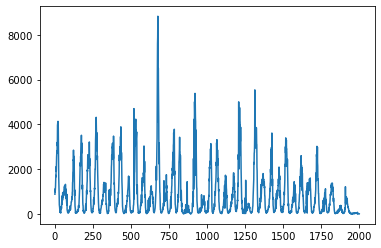

In [75]:
plt.plot(NYtsmeasles)

In [76]:
#Funcion util para encontrar minimos locales.
%matplotlib inline
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

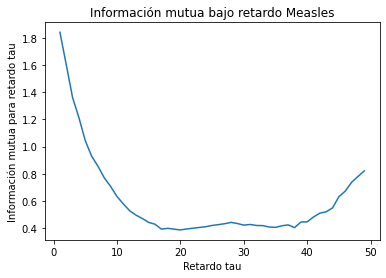

Los mínimos locales se alcanzan para tau=[17 20 30 35 38]


In [77]:
Time_series=[NYtsmeasles/max(NYtsmeasles)]
for i in range(len(Time_series)):
    X=Time_series[i]
    #Calculo de la información mutua entre X_t, X_(t+tau)
    time_delay_mi=np.zeros(49)
    for tau in range(1,50):
        td=delay.mi(X[:-tau],X[tau:])
        time_delay_mi[tau-1]=td
    if i==0:
        plt.title('Información mutua bajo retardo Measles')
    if i==1:
        plt.title('Información mutua bajo retardo Polio')
    if i==2:
        plt.title('Información mutua bajo retardo Rubella')
    if i==3:
        plt.title('Información mutua bajo retardo Smallpox')
    if i==4:
        plt.title('Información mutua bajo retardo Dinamarca')
#     if i==5:
#         plt.title('Información mutua bajo retardo Nueva Zelanda')
    if i==5:
        plt.title('Información mutua bajo retardo Alemania')
    if i==6:
        plt.title('Información mutua bajo retardo Italia')
    plt.plot(range(1,50),time_delay_mi)
    plt.xlabel('Retardo tau')
    plt.ylabel('Información mutua para retardo tau')
    plt.show()
    print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

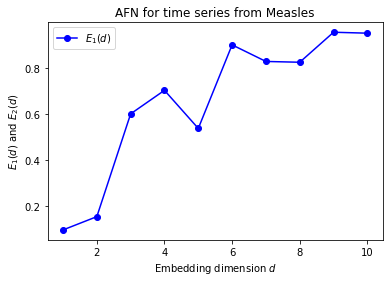

In [78]:
Tau=[17]
Ciudades=['Measles', 'Polio', 'Rubella']
for i in range(1):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1,10 + 2)
    E, Es = dimension.afn(X, tau=Tau[i], dim=dim, window=100,maxnum=500)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.title(r'AFN for time series from ' + str(Ciudades[i]))
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    #plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
    plt.show()

In [79]:
Embdim=[6]

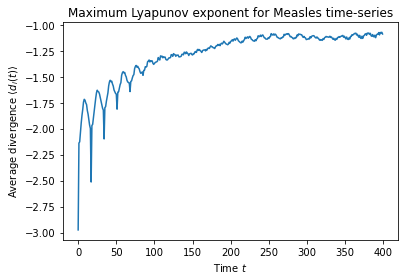

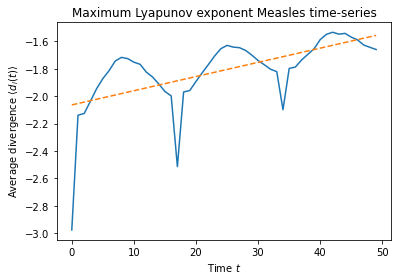

Linear fitting coeficient=0.010341074036479195


In [86]:
MLEs_nolitsa=np.zeros(1)
Ciudades=['Measles']
for i in range(1):
    X=Time_series[i]
    LEs=lyapunov.mle_embed(X, dim=[Embdim[i]], tau=Tau[i], window=50, maxt=400)[0]
    plt.plot(range(len(LEs)),LEs)
    plt.title('Maximum Lyapunov exponent for '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.show()

    sma=noise.sma(LEs[:50], hwin=0)
    plt.title('Maximum Lyapunov exponent '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.plot(np.arange(len(sma)),sma)
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    plt.plot(xaxis, yaxis, '--')
    plt.show()
    print('Linear fitting coeficient='+str(p[0]))
    MLEs_nolitsa[i]=p[0]

In [87]:
print("Valor obtenido de MLE con nolitsa: "+str(MLEs_nolitsa*52))
#En bit/año

Valor obtenido de MLE con nolitsa: [0.53773585]


In [ ]:
#Coincide con el paper de Canals